In [ ]:
#emotion disease from kaggle
#kaggle api dwnld

In [ ]:
import random
import numpy as np
import tensorflow as tf
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [ ]:
pr=json.load(open("kaggle.json"))

In [ ]:
os.environ["KAGGLE_USERNAME"]=pr["username"]
os.environ["KAGGLE_KEY"]=pr["key"]

In [ ]:
import kaggle

In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 91% 59.0M/65.2M [00:00<00:00, 318MB/s]
100% 65.2M/65.2M [00:00<00:00, 312MB/s]


In [ ]:
ls

emotion-detection-fer.zip  kaggle.json  sample_data/


In [ ]:
f1=ZipFile("emotion-detection-fer.zip")
f1.extractall()
f1.close()

In [ ]:
ls

 kaggle.json  'plantvillage dataset'/   plantvillage-dataset.zip   sample_data/


In [ ]:
base_dir=base_dir = "/content"  # Change this if needed
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

print("Train Directory:", train_dir)
print("Test Directory:", test_dir)


Train Directory: /content/train
Test Directory: /content/test


In [ ]:
ipath="/content/train/angry/im100.png"

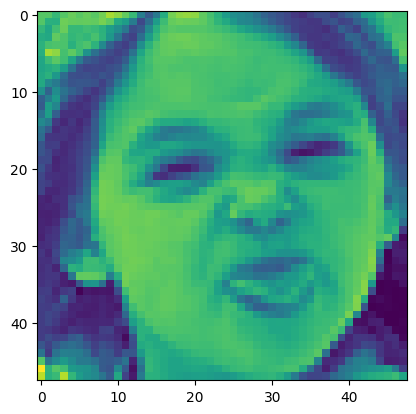

In [ ]:
img=mpimg.imread(ipath)
plt.imshow(img)

(-0.5, 47.5, 47.5, -0.5)

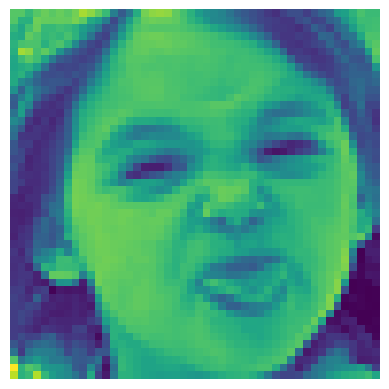

In [ ]:
img=mpimg.imread(ipath)
plt.imshow(img)
plt.axis("off")

In [ ]:
img.shape

(48, 48)

In [ ]:
#make all the images uniform
img_size = 48
batch_size = 64
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_gen.flow_from_directory(
    '/content/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    '/content/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    subset='validation'
)
print("Correct Class Indices:", train_generator.class_indices)



Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Correct Class Indices: {'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(img_size, img_size, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(train_generator.num_classes, activation="softmax"))


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 14112)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       3,612,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,624,295 (13.83 MB)

 Trainable params: 3,624,295 (13.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Pass the data to my network
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(train_generator,steps_per_epoch=train_generator.samples//batch_size,
          epochs=6,
          validation_data=validation_generator,validation_steps=validation_generator.samples//batch_size)

Epoch 1/6
358/358 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.3115 - loss: 1.7177 - val_accuracy: 0.4291 - val_loss: 1.5016
Epoch 2/6
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4688 - loss: 1.4664 - val_accuracy: 0.4229 - val_loss: 1.5087
Epoch 3/6
358/358 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.4530 - loss: 1.4171 - val_accuracy: 0.4717 - val_loss: 1.3892
Epoch 4/6
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5781 - loss: 1.1985 - val_accuracy: 0.4686 - val_loss: 1.3821
Epoch 5/6
358/358 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5181 - loss: 1.2621 - val_accuracy: 0.4891 - val_loss: 1.3723
Epoch 6/6
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4531 - loss: 1.2540 - val_accuracy: 0.4895 - val_loss: 1.3656


In [ ]:
model.save("pr.h5")

In [ ]:

train_generator.class_indices.items()

dict_items([('angry', 0), ('disgusted', 1), ('fearful', 2), ('happy', 3), ('neutral', 4), ('sad', 5), ('surprised', 6)])

In [ ]:

train_generator.class_indices.items()
{v:k for k,v in train_generator.class_indices.items()}

{0: 'angry',
 1: 'disgusted',
 2: 'fearful',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprised'}

In [ ]:

train_generator.class_indices.items()
pr_classes={v:k for k,v in train_generator.class_indices.items()}

In [ ]:

json.dump(pr_classes,open("pr_classes.json","w"))

In [ ]:
ls

emotion-detection-fer.zip  kaggle.json  pr_classes.json  pr.h5  sample_data/  test/  train/


In [ ]:
import json
with open("pr_classes.json", "r") as f:
    loaded_classes = json.load(f)
print(loaded_classes)


{'0': 'angry', '1': 'disgusted', '2': 'fearful', '3': 'happy', '4': 'neutral', '5': 'sad', '6': 'surprised'}


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

def load_preprocess_image(ipath, target_size=(48, 48)):
    img = Image.open(ipath).convert("L")
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype("float32") / 255.
    return img_array



In [ ]:
def emotion_detection(model, ipath, class_indices):
    """Predict the emotion from the given image using the trained model."""
    preprocess_img = load_preprocess_image(ipath)
    prediction = model.predict(preprocess_img)
    predicted_class_index = np.argmax(prediction, axis=1)[0]

    class_indices = {int(k): v for k, v in class_indices.items()}

    return class_indices.get(predicted_class_index, f"Unknown class (index {predicted_class_index})")


In [ ]:
i1="/content/test/fearful/im1001.png"
i2="/content/test/happy/im100.png"
i3="/content/test/angry/im109.png"
i4="/content/test/disgusted/im101.png"
i5="/content/test/neutral/im1.png"
i6="/content/test/sad/im10.png"
i7="/content/test/surprised/im101.png"

In [ ]:
emotion_detection(model,i1,pr_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'fearful'

In [ ]:
emotion_detection(model,i2,pr_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'happy'

In [ ]:
emotion_detection(model,i3,pr_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


'angry'

In [ ]:
emotion_detection(model,i4,pr_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'disgusted'

In [ ]:
emotion_detection(model,i5,pr_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'neutral'

In [ ]:
emotion_detection(model,i6,pr_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'sad'

In [ ]:
emotion_detection(model,i7,pr_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'surprised'